
# Assignment 2

**Kacper Kinastowski 30/03/2023**

**Diffusion processes on complex networks**

## TOC:
* [Graph Class docummentation](#class)
* [Class Implementation](#class-imp)
* [Example 1 - how to use this class?](#ex1)
* [Example 2 - name list](#ex2)

## Graph Class docummentation <a class="anchor" id="class"></a>

My goal was to implement undirected graph structure in Python. The structure  

Class **Graph** has the following attributes:

- **vertices** -  A dictionary of vertices and their neighbors. Every vertex is represented by a key in the dictionary and it's value is a list of tuples. Every tuple stores two values, first value represents the neighbor and the second represents the weight of this bond.

For example the graph connection between '*Bob*' and '*Alice*' with bond weight = 0.5 can be represented by:

In [1]:
example_dictionary = {'Bob': [('Alice', 0.5)], 'Alice': [('Bob', 0.5)]}

Class **Graph** has the following methods:

- **__init__(self)** - initialization of graph dictionary.

- **addVertex(self, vert)** - adds vertice to existing graph. Method does not create duplicates.

- **addVerticesFromList(self, vertList)** - adds list of vertices to existing graph.

- **addEdge(self, fromVert, toVert, weight = 1)** - adds edge between two vertices **fromVert** and **toVert** with default **weight = 1**. If given vertices are not present in graph, the method creates them.

- **getVertices()** - Returns a list of all vertices in the graph.

- **getEdges()** - Returns a list of all edges in the graph.

- **getNeighbors(vertKey)** - Returns a list of neighbors of the given vertex **vertKey**. If the vertex does not exist, returns an empty list.

- **__contains__(vert)** - Returns **True** if the given vertex is in the graph, **False** otherwise.

- **saveGraph(filename)** - Saves the graph in the **DOT** language to a file. The file can be used with graph visualization software.

- **shortestDistance(fromVert)** - Returns dictionary with shortest distance between **fromVert** and other vertices in the graph. This method uses Dijkstra's algorithm to find the shortest path from the given vertex to all other vertices in the graph. 

## Class Implementation <a class="anchor" id="class-imp"></a>

In [2]:
import random
import networkx as nx

class Graph:
    
    def __init__(self):
        self.vertices = {}
        
    def addVertex(self, vert):
        if vert not in self.vertices:
            self.vertices[vert] = []
            
    def addVerticesFromList(self, vertList):
        for i in vertList:
            self.addVertex(i)
            
    def addEdge(self, fromVert, toVert, weight = 1):
        
        verts_args = (fromVert, toVert)
        
        for element in verts_args:
            if element not in self.vertices:
                self.addVertex(element)
    
        tup_toVert = (toVert, weight)
        tup_fromVert = (fromVert, weight)
        
        self.vertices[fromVert].append(tup_toVert)
        self.vertices[toVert].append(tup_fromVert)
        
    def getVertices(self):
        return self.vertices.keys()

    def getEdges(self):
        
        edges = []

        for vert in self.vertices:
            for neighbor, weight in self.vertices[vert]:
                if (neighbor, vert, weight) not in edges:
                    edges.append((vert, neighbor, weight))

        return edges
    
    def getNeighbors(self, vertKey):
        if vertKey in self.vertices:
            l = [neigh[0] for neigh in self.vertices[vertKey]]
        else:
            l = []
            
        #delete duplicates
        res = [*set(l)]
        return res
        
    
    def __contains__(self, vert):
        return vert in self.vertices
    
    def saveGraph1(self, filename):
        with open(filename, 'w') as f:
            f.write('graph {\n')
            for vert in self.vertices:
                for neigh in self.vertices[vert]:
                    f.write('\t{} -- {} [label={}];\n'.format(vert, neigh[0], neigh[1]))
            f.write('}\n')
            
    def saveGraph(self, filename, add_label=False):
        with open(filename, 'w') as f:
            f.write('graph {\n')
            visited = set()
            for vert in self.vertices:
                for neigh, weight in self.vertices[vert]:
                    if (vert, neigh) not in visited and (neigh, vert) not in visited:
                        if add_label:
                            f.write('\t{} -- {} [label={}];\n'.format(vert, neigh, weight))
                        else:
                            f.write('\t{} -- {};\n'.format(vert, neigh))
                        visited.add((vert, neigh))
            f.write('}\n')

    def getShortestPaths(self, fromVert):
        distances = {vert: float('inf') for vert in self.vertices}
        distances[fromVert] = 0
        visited = {vert: False for vert in self.vertices}

        while True:
            minDist = float('inf')
            minVert = None
            for vert in self.vertices:
                if not visited[vert] and distances[vert] < minDist:
                    minDist = distances[vert]
                    minVert = vert

            if minVert is None:
                break

            for neigh, weight in self.vertices[minVert]:
                newDist = distances[minVert] + weight
                if newDist < distances[neigh]:
                    distances[neigh] = newDist

            visited[minVert] = True

        return distances
    
    def toNetworkx(self):
        nx_graph = nx.Graph()

        for vertex in self.vertices:
            nx_graph.add_node(vertex)

        for edge in self.getEdges():
            from_vert, to_vert, weight = edge
            nx_graph.add_edge(from_vert, to_vert, weight=weight)

        return nx_graph

    def randomGraph(self, n, p):
        self.vertices = {}
        self.numVertices = 0

        for node in range(n):
            self.addVertex(node)

        edges = [(i, j) for i in range(n) for j in range(i + 1, n) if random.random() < p]

        for i, j in edges:
            self.addEdge(i, j)

        return self
                    
    def removeEdge(self, fromVert, toVert):
        if fromVert in self.vertices and toVert in self.vertices:
            self.vertices[fromVert] = [(v, w) for v, w in self.vertices[fromVert] if v != toVert]
            self.vertices[toVert] = [(v, w) for v, w in self.vertices[toVert] if v != fromVert]
    
    def wattsStrogatz1(self, n, k, p):
        if k >= n:
            raise ValueError("k must be less than n")
        self.vertices = {}
        self.numVertices = 0

        # Create a ring lattice
        for node in range(n):
            neighbors = [(node + i) % n for i in range(1, k // 2 + 1)]
            self.addVertex(node)
            for neighbor in neighbors:
                self.addEdge(node, neighbor)

        # Rewire edges
        for i in range(n):
            for j in range(i + 1, i + k // 2 + 1):
                if random.random() < p:
                    new_j = random.randint(0, n - 1)
                    while new_j == i or (i, new_j) in self.getEdges() or (new_j, i) in self.getEdges():
                        new_j = random.randint(0, n - 1)
                    self.removeEdge(i, j % n)
                    self.addEdge(i, new_j)
        return self

### What's new? <a class="anchor" id="ex1"></a>

Demo of new *randomGraph* method:

In [3]:
graph = Graph()
graph.randomGraph(100, 0.02)

New *toNetworkx method* :

In [4]:
x = graph.toNetworkx()
print(x.edges)

[(0, 25), (0, 62), (1, 57), (1, 71), (2, 7), (3, 67), (3, 87), (5, 85), (6, 44), (8, 19), (8, 36), (8, 54), (8, 66), (8, 68), (9, 61), (10, 81), (12, 41), (12, 88), (13, 98), (14, 45), (14, 47), (14, 61), (15, 19), (15, 46), (17, 57), (18, 71), (19, 20), (19, 76), (20, 98), (21, 65), (21, 98), (22, 76), (22, 86), (24, 52), (25, 34), (25, 50), (25, 52), (25, 58), (26, 76), (26, 99), (27, 50), (28, 46), (28, 99), (30, 38), (30, 73), (30, 79), (31, 63), (32, 71), (32, 89), (33, 46), (33, 47), (33, 80), (33, 92), (34, 53), (34, 56), (35, 67), (38, 40), (38, 55), (38, 88), (39, 55), (39, 73), (39, 76), (40, 47), (40, 93), (43, 47), (44, 56), (46, 67), (47, 58), (47, 78), (49, 82), (49, 89), (50, 81), (50, 90), (52, 86), (52, 95), (53, 89), (54, 65), (54, 88), (56, 57), (57, 98), (58, 69), (58, 99), (61, 87), (62, 88), (62, 99), (67, 85), (67, 98), (70, 75), (72, 83), (75, 76), (78, 81), (85, 90), (86, 99)]


[(0, 18), (0, 8), (0, 4), (1, 2), (1, 3), (1, 14), (2, 17), (2, 8), (2, 19), (3, 5), (3, 10), (4, 6), (4, 17), (5, 6), (5, 9), (5, 13), (6, 7), (6, 8), (6, 18), (7, 8), (7, 9), (8, 9), (8, 14), (8, 17), (9, 10), (9, 11), (9, 15), (10, 11), (10, 12), (11, 12), (11, 13), (12, 13), (12, 14), (13, 14), (14, 16), (14, 19), (15, 16), (16, 17), (16, 18), (17, 19)]


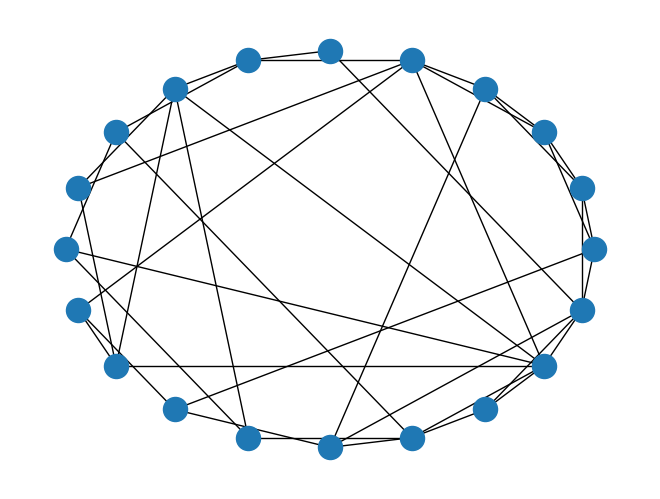

In [8]:
ws = Graph()
ws.wattsStrogatz1(20, 4, 0.4)

y = ws.toNetworkx()
print(y.edges)
nx.draw(y, pos=nx.shell_layout(y))

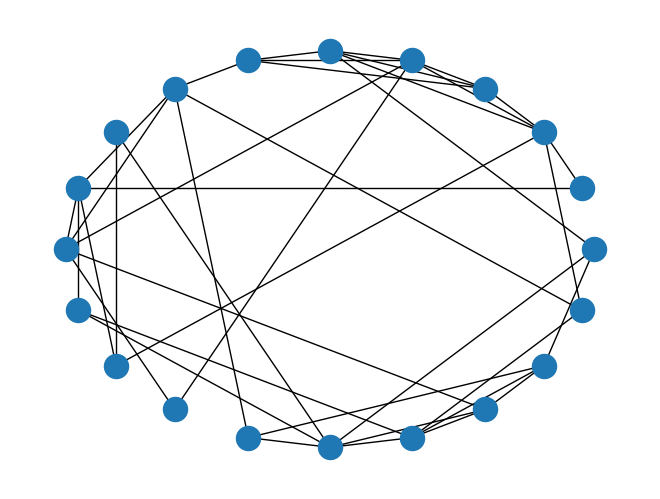

In [9]:
reference = nx.watts_strogatz_graph(20, 4, 0.4)
nx.draw(reference, pos=nx.shell_layout(reference))